# **Ïä§ÎßàÌä∏Ìè∞ ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Î™®ÏÖò Î∂ÑÎ•ò**
# Îã®Í≥Ñ 3: Îã®Í≥ÑÎ≥Ñ Î™®Îç∏ÎßÅ

## ÌôòÍ≤ΩÏÑ§Ï†ï

* Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Î∞îÎ°ú Î∞ëÏóê ÏÉà Ìè¥ÎçîÎ•º ÎßåÎì§Í≥† Îç∞Ïù¥ÌÑ∞ ÌååÏùº ÎÑ£Í∏∞

In [ ]:
# Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/miniproject1/'

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# ÌïôÏäµÍ≥°ÏÑ† Ìï®Ïàò
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='train_err', marker='.')
    plt.plot(history.history['val_loss'], label='val_err', marker='.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_test.csv')
df_features = pd.read_csv(path + 'features.csv')

In [ ]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
df_train.drop('subject', axis=1, inplace=True)
df_test.drop('subject', axis=1, inplace=True)

### EDA

In [ ]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (5881, 562)
Test shape: (1471, 562)


In [ ]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÉÅÏúÑ 5Í∞ú Ìñâ ÌôïÏù∏
print("Train head:")
display(df_train.head())
print("\nTest head:")
display(df_test.head())

Train head:


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288508          -0.009196          -0.103362         -0.988986   
1           0.265757          -0.016576          -0.098163         -0.989551   
2           0.278709          -0.014511          -0.108717         -0.997720   
3           0.289795          -0.035536          -0.150354         -0.231727   
4           0.394807           0.034098           0.091229          0.088489   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.962797         -0.967422         -0.989000         -0.962596   
1         -0.994636         -0.987435         -0.990189         -0.993870   
2         -0.981088         -0.994008         -0.997934         -0.982187   
3         -0.006412         -0.338117         -0.273557          0.014245   
4         -0.106636         -0.388502         -0.010469         -0.109680   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.965650         -0.929747  ...                        -0.487737   
1         -0.987558         -0.937337  ...                        -0.237820   
2         -0.995017         -0.942584  ...                        -0.535287   
3         -0.347916          0.008288  ...                        -0.004012   
4         -0.346372          0.584131  ...                        -0.157832   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.816696                    -0.042494   
1                        -0.693515                    -0.062899   
2                        -0.829311                     0.000265   
3                        -0.408956                    -0.255125   
4                        -0.563437                    -0.044344   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                             -0.044218                          0.307873   
1                              0.388459                         -0.765014   
2                             -0.525022                         -0.891875   
3                              0.612804                          0.747381   
4                             -0.845268                         -0.974650   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.072790             -0.601120   
1                              0.771524              0.345205   
2                              0.021528             -0.833564   
3                             -0.072944             -0.695819   
4                             -0.887846             -0.705029   

   angle(Y,gravityMean)  angle(Z,gravityMean)            Activity  
0              0.331298              0.165163            STANDING  
1             -0.769186             -0.147944              LAYING  
2              0.202434             -0.032755            STANDING  
3              0.287154              0.111388             WALKING  
4              0.264952              0.137758  WALKING_DOWNSTAIRS  

[5 rows x 562 columns]


Test head:


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.284379          -0.021981          -0.116683         -0.992490   
1           0.277440          -0.028086          -0.118412         -0.996620   
2           0.305833          -0.041023          -0.087303          0.006880   
3           0.276053          -0.016487          -0.108381         -0.995379   
4           0.271998           0.016904          -0.078856         -0.973468   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.979640         -0.963321         -0.992563         -0.977304   
1         -0.927676         -0.972294         -0.997346         -0.931405   
2          0.182800         -0.237984          0.005642          0.028616   
3         -0.983978         -0.975854         -0.995877         -0.985280   
4         -0.702462         -0.869450         -0.979810         -0.711601   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.958142         -0.938850  ...                        -0.509523   
1         -0.971788         -0.939837  ...                        -0.210792   
2         -0.236474          0.016311  ...                         0.579587   
3         -0.974907         -0.941425  ...                        -0.566291   
4         -0.856807         -0.920760  ...                         0.447577   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.850065                    -0.018043   
1                        -0.613367                    -0.022456   
2                         0.394388                    -0.362616   
3                        -0.841455                     0.289548   
4                         0.214219                     0.010111   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.092304                          0.074220   
1                             -0.155414                          0.247498   
2                              0.171069                          0.576349   
3                              0.079801                         -0.020033   
4                              0.114179                         -0.830776   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.714534             -0.671943   
1                             -0.112257             -0.826816   
2                             -0.688314             -0.743234   
3                              0.291898             -0.639435   
4                             -0.325098             -0.840817   

   angle(Y,gravityMean)  angle(Z,gravityMean)  Activity  
0             -0.018351             -0.185733   SITTING  
1              0.184489             -0.068699  STANDING  
2              0.272186              0.053101   WALKING  
3             -0.111998             -0.123298   SITTING  
4              0.116237             -0.096615  STANDING  

[5 rows x 562 columns]

In [ ]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÏöîÏïΩ Ï†ïÎ≥¥ ÌôïÏù∏
print("Train info:")
print(df_train.info())
print("\nTest info:")
print(df_test.info())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 6.3+ MB
None


In [ ]:
# ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
print("Train numerical summary:")
display(df_train.describe())
print("\nTest numerical summary:")
display(df_test.describe())

Train numerical summary:


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        5881.000000        5881.000000        5881.000000   
mean            0.274811          -0.017799          -0.109396   
std             0.067614           0.039422           0.058373   
min            -0.503823          -0.684893          -1.000000   
25%             0.262919          -0.024877          -0.121051   
50%             0.277154          -0.017221          -0.108781   
75%             0.288526          -0.010920          -0.098163   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       5881.000000       5881.000000       5881.000000       5881.000000   
mean          -0.603138         -0.509815         -0.604058         -0.628151   
std            0.448807          0.501815          0.417319          0.424345   
min           -1.000000         -0.999844         -0.999667         -1.000000   
25%           -0.992774         -0.977680         -0.980127         -0.993602   
50%           -0.943933         -0.844575         -0.856352         -0.948501   
75%           -0.242130         -0.034499         -0.262690         -0.291138   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       5881.000000       5881.000000       5881.000000  ...   
mean          -0.525944         -0.605374         -0.465490  ...   
std            0.485115          0.413043          0.544995  ...   
min           -0.999419         -1.000000         -1.000000  ...   
25%           -0.977865         -0.980112         -0.936067  ...   
50%           -0.849266         -0.849896         -0.878729  ...   
75%           -0.068857         -0.268539         -0.013690  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
count                      5881.000000                      5881.000000   
mean                          0.126955                        -0.305883   
std                           0.249176                         0.322808   
min                          -0.965725                        -0.979261   
25%                          -0.021610                        -0.541969   
50%                           0.133887                        -0.342923   
75%                           0.288944                        -0.127371   
max                           0.946700                         0.989538   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
count                      5881.000000                  5881.000000   
mean                         -0.623548                     0.008524   
std                           0.310371                     0.339730   
min                          -0.999765                    -0.976580   
25%                          -0.845985                    -0.122361   
50%                          -0.712677                     0.010278   
75%                          -0.501158                     0.154985   
max                           0.956845                     1.000000   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
count                           5881.000000                       5881.000000   
mean                              -0.001185                          0.009340   
std                                0.447197                          0.608190   
min                               -1.000000                         -1.000000   
25%                               -0.294369                         -0.481718   
50%                                0.005146                          0.011448   
75%                                0.285030                          0.499857   
max                                1.000000                          0.998702   

       angle(tBodyGyroJ


Test numerical summary:


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        1471.000000        1471.000000        1471.000000   
mean            0.273198          -0.017281          -0.108123   
std             0.079989           0.045957           0.049082   
min            -1.000000          -1.000000          -0.418354   
25%             0.263787          -0.024792          -0.120733   
50%             0.277322          -0.017187          -0.108124   
75%             0.288058          -0.010238          -0.096606   
max             0.631510           0.359587           0.543939   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       1471.000000       1471.000000       1471.000000       1471.000000   
mean          -0.614634         -0.515427         -0.607533         -0.639950   
std            0.448480          0.506094          0.424243          0.422994   
min           -0.999717         -0.999873         -1.000000         -0.999867   
25%           -0.992669         -0.979082         -0.981070         -0.993498   
50%           -0.952426         -0.867309         -0.869890         -0.958705   
75%           -0.245405         -0.030639         -0.260223         -0.297260   
max            0.899922          0.782590          0.931308          0.950758   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       1471.000000       1471.000000       1471.000000  ...   
mean          -0.530760         -0.609256         -0.481055  ...   
std            0.489381          0.418536          0.542756  ...   
min           -1.000000         -0.999879         -0.948723  ...   
25%           -0.979214         -0.980659         -0.936791  ...   
50%           -0.873891         -0.863451         -0.890491  ...   
75%           -0.058824         -0.256657         -0.030692  ...   
max            0.602458          0.784041          0.821218  ...   

       fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
count                      1471.000000                      1471.000000   
mean                          0.118651                        -0.311513   
std                           0.258112                         0.313792   
min                          -1.000000                        -0.995357   
25%                          -0.035193                        -0.546342   
50%                           0.135282                        -0.347433   
75%                           0.289832                        -0.125796   
max                           0.860512                         0.941113   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
count                      1471.000000                  1471.000000   
mean                         -0.632273                     0.009324   
std                           0.296179                     0.324864   
min                          -0.994664                    -0.937468   
25%                          -0.844547                    -0.119166   
50%                          -0.706699                     0.005049   
75%                          -0.516910                     0.135698   
max                           0.894210                     0.980889   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
count                           1471.000000                       1471.000000   
mean                               0.015666                          0.006272   
std                                0.452616                          0.608954   
min                               -0.990492                         -0.995222   
25%                               -0.265533                         -0.485998   
50%                                0.023421                         -0.005036   
75%                                0.312690                          0.518184   
max                                0.991899                          0.994366   

       angle(tBodyGyroJ

* target Îã®Î≥ÄÎüâ Î∂ÑÏÑù

In [ ]:
# target Î≥ÄÏàòÏùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏(Í∞úÏàò Í∏∞Ï§Ä)
print("Train Activity label counts:")
print(df_train['Activity'].value_counts())
print("\nTest Activity label counts:")
print(df_test['Activity'].value_counts())

Train Activity label counts:
Activity
LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: count, dtype: int64

Test Activity label counts:
Activity
LAYING                292
STANDING              287
SITTING               254
WALKING               228
WALKING_UPSTAIRS      215
WALKING_DOWNSTAIRS    195
Name: count, dtype: int64


In [ ]:
# target Î≥ÄÏàòÏùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏(ÎπÑÏú® Í∏∞Ï§Ä)
print("Train Activity label proportion:")
print(df_train['Activity'].value_counts(normalize=True))
print("\nTest Activity label proportion:")
print(df_test['Activity'].value_counts(normalize=True))

Train Activity label proportion:
Activity
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: proportion, dtype: float64

Test Activity label proportion:
Activity
LAYING                0.198504
STANDING              0.195105
SITTING               0.172672
WALKING               0.154997
WALKING_UPSTAIRS      0.146159
WALKING_DOWNSTAIRS    0.132563
Name: proportion, dtype: float64


## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### 1Îã®Í≥Ñ Î™®Îç∏ÎßÅÏùÑ ÏúÑÌïú Î†àÏù¥Î∏î

In [ ]:
# Ï†ïÏ†Å(0) / ÎèôÏ†Å(1) Î†àÏù¥Î∏î ÏÉùÏÑ±
df_train['is_dynamic'] = df_train['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1)
df_test['is_dynamic'] = df_test['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1)

### X, y Î∂ÑÎ¶¨

In [ ]:
X = df_train.drop(['is_dynamic', 'Activity'], axis=1)
y = df_train['is_dynamic']  # 1Îã®Í≥Ñ target

X_test = df_test.drop(['is_dynamic', 'Activity'], axis=1)
y_test = df_test['is_dynamic']  # 1Îã®Í≥Ñ target

### Ïä§ÏºÄÏùºÎßÅ

üí≠ (Îëò Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§ !)

In [ ]:
# StandardScaler(ÌëúÏ§ÄÌôî)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MinMaxScaler(Ï†ïÍ∑úÌôî)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### train/validation Î∂ÑÌï†

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                  test_size=0.2,
                                                  random_state=42)

## **ÎØ∏ÏÖò 4: Îã®Í≥ÑÎ≥Ñ Î™®Îç∏ÎßÅ**

### 1Îã®Í≥Ñ Ïù¥ÏßÑ Î∂ÑÎ•ò
* Ï†ïÏ†Å/ÎèôÏ†Å ÌñâÎèô Î∂ÑÎ•ò Î™®Îç∏

In [ ]:
# 1Îã®Í≥Ñ: Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2Îã®Í≥Ñ: ÏÑ†Ïñ∏ÌïòÍ∏∞
model = RandomForestClassifier(random_state=42)

# 3Îã®Í≥Ñ: ÌïôÏäµÌïòÍ∏∞
model.fit(X_train, y_train)

# 4Îã®Í≥Ñ: ÏòàÏ∏°ÌïòÍ∏∞
y_pred = model.predict(X_val)

# 5Îã®Í≥Ñ: ÌèâÍ∞ÄÌïòÍ∏∞
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


### 2Îã®Í≥Ñ Îã§Ï§ë Î∂ÑÎ•ò
* Ï†ïÏ†Å ÌñâÎèô ÏÑ∏Î∂Ä Î∂ÑÎ•ò Î™®Îç∏
* ÎèôÏ†Å ÌñâÎèô ÏÑ∏Î∂Ä Î∂ÑÎ•ò Î™®Îç∏

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

**Ï†ïÏ†Å ÌñâÎèô ÏÑ∏Î∂Ä Î∂ÑÎ•ò**

In [ ]:
# Ï†ïÏ†Å(0) ÌñâÎèô Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
df_static_train = df_train[df_train['is_dynamic'] == 0].copy()
df_static_test = df_test[df_test['is_dynamic'] == 0].copy()

In [ ]:
# target Ïù∏ÏΩîÎî©
label_mapping = {'LAYING': 0, 'SITTING': 1, 'STANDING': 2}
df_static_train['Activity'] = df_static_train['Activity'].map(label_mapping)
df_static_test['Activity'] = df_static_test['Activity'].map(label_mapping)

In [ ]:
# X, y Î∂ÑÎ¶¨
X_static_train = df_static_train.drop(['is_dynamic', 'Activity'], axis=1)
y_static_train = df_static_train['Activity']
X_static_test = df_static_test.drop(['is_dynamic', 'Activity'], axis=1)
y_static_test = df_static_test['Activity']

In [ ]:
# StandardScaler(ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_static_train_scaled = scaler.fit_transform(X_static_train)
X_static_test_scaled = scaler.transform(X_static_test)

# MinMaxScaler(Ï†ïÍ∑úÌôî)
# scaler = MinMaxScaler()
# X_static_train_scaled = scaler.fit_transform(X_static_train)
# X_static_test_scaled = scaler.transform(X_static_test)

In [ ]:
# train/validation Î∂ÑÌï†
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_static_train_scaled, y_static_train,
                                                          test_size=0.2,
                                                          random_state=42)

Epoch 1/20
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5704 - loss: 0.9086 - val_accuracy: 0.8949 - val_loss: 0.2962
Epoch 2/20
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8805 - loss: 0.3013 - val_accuracy: 0.9366 - val_loss: 0.2048
Epoch 3/20
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9264 - loss: 0.1857 - val_accuracy: 0.9660 - val_loss: 0.1181
Epoch 4/20
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9537 - loss: 0.1248 - val_accuracy: 0.9490 - val_loss: 0.1255
Epoch 5/20
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9549 - loss: 0.1035 - val_accuracy: 0.9691 - val_loss: 0.1317
Epoch 6/20
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9702 - loss: 0.0908 - val_accuracy: 0.9675 - val_loss: 0.0999
Epoc

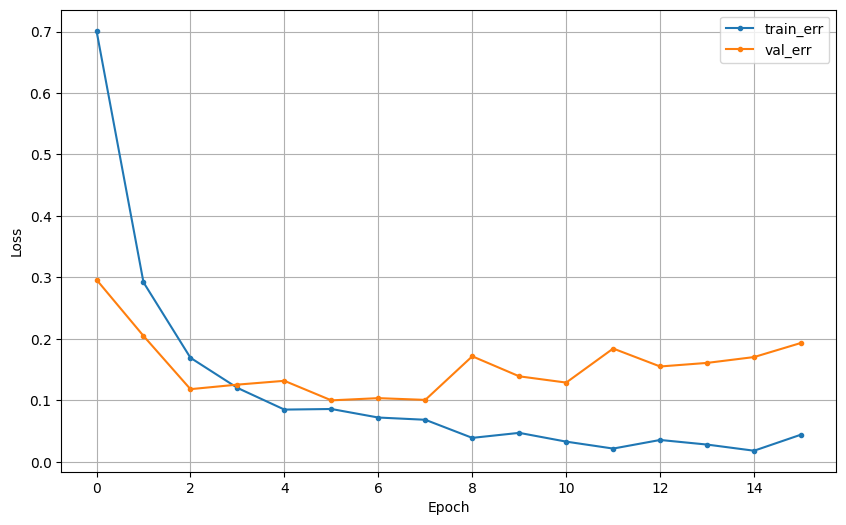

In [ ]:
# Î™®Îç∏ 1: ÏùÄÎãâÏ∏µ 5Í∞ú + Epoch 20 + ÌïôÏäµÎ•† 0.001 + Early Stopping
def build_deep_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(256, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 4
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 5
        Dense(output_dim, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÌïôÏäµ
deep_model = build_deep_model(X_train_s.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = deep_model.fit(X_train_s, y_train_s,
                         validation_data=(X_val_s, y_val_s),
                         epochs=20,
                         batch_size=64,
                         verbose=1,
                         callbacks=[early_stopping])

# ÌïôÏäµÍ≥°ÏÑ†
dl_history_plot(history)

In [ ]:
# ÌèâÍ∞Ä
_, val_accuracy = deep_model.evaluate(X_val_s, y_val_s)
print(f"Validation Accuracy: {val_accuracy:.4f}")

21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9681 - loss: 0.0977 
Validation Accuracy: 0.9675


Epoch 1/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.6114 - loss: 0.8805 - val_accuracy: 0.9057 - val_loss: 0.3254
Epoch 2/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.9291 - loss: 0.2327 - val_accuracy: 0.9413 - val_loss: 0.1749
Epoch 3/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9694 - loss: 0.1056 - val_accuracy: 0.9552 - val_loss: 0.1180
Epoch 4/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0642 - val_accuracy: 0.9536 - val_loss: 0.1523
Epoch 5/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0476 - val_accuracy: 0.9583 - val_loss: 0.1082
Epoch 6/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0386 - val_accuracy: 0.9598 - val_loss: 0.1051
Epo

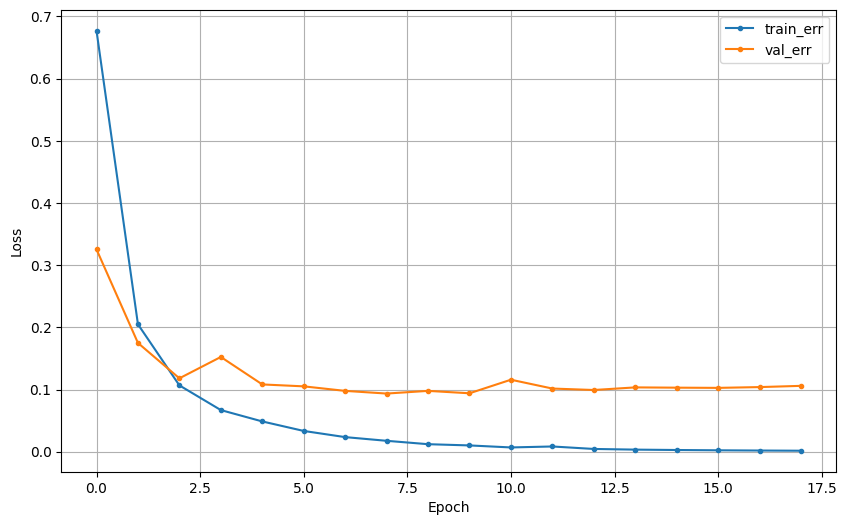

In [ ]:
# Î™®Îç∏ 2: ÏùÄÎãâÏ∏µ 3Í∞ú + Epoch 30 + ÌïôÏäµÎ•† 0.0005 + Early Stopping
def build_lowlr_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(output_dim, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # ÎÇÆÏùÄ ÌïôÏäµÎ•†
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÌïôÏäµ
lowlr_model = build_lowlr_model(X_train_s.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lowlr_model.fit(X_train_s, y_train_s,
                          validation_data=(X_val_s, y_val_s),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# ÌïôÏäµÍ≥°ÏÑ†
dl_history_plot(history)

In [ ]:
# ÌèâÍ∞Ä
_, val_accuracy = lowlr_model.evaluate(X_val_s, y_val_s)
print(f"Validation Accuracy: {val_accuracy:.4f}")

21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0864 
Validation Accuracy: 0.9737


Epoch 1/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.4835 - loss: 1.0002 - val_accuracy: 0.8733 - val_loss: 0.3695
Epoch 2/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8288 - loss: 0.3998 - val_accuracy: 0.9397 - val_loss: 0.1735
Epoch 3/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.9212 - loss: 0.2104 - val_accuracy: 0.9428 - val_loss: 0.1578
Epoch 4/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.9391 - loss: 0.1556 - val_accuracy: 0.9614 - val_loss: 0.1139
Epoch 5/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.9490 - loss: 0.1275 - val_accuracy: 0.9598 - val_loss: 0.1192
Epoch 6/30
41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - accuracy: 0.9640 - loss: 0.1001 - val_accuracy: 0.9598 - val_loss: 0.1195


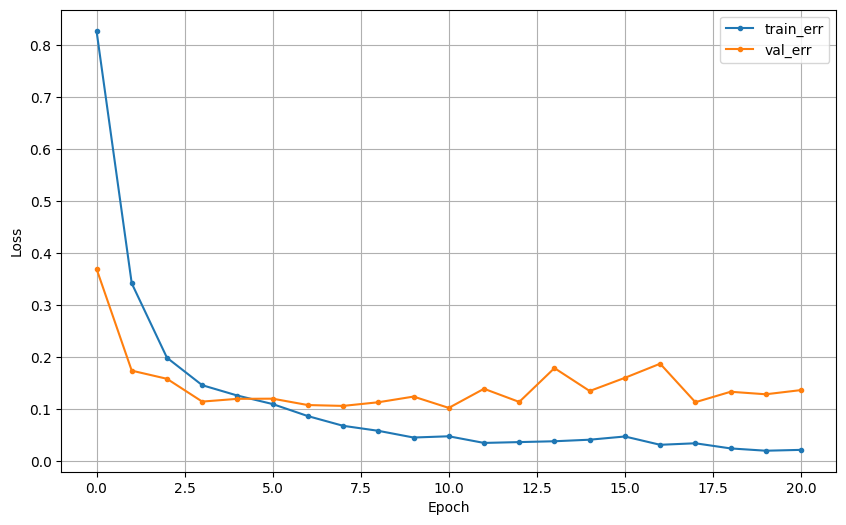

In [ ]:
# Î™®Îç∏ 3: ÏùÄÎãâÏ∏µ 5Í∞ú + Epoch 30 + ÌïôÏäµÎ•† 0.0005 + Early Stopping
def build_tuned_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(256, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 4
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 5
        Dense(output_dim, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÌïôÏäµ
tuned_model = build_tuned_model(X_train_s.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = tuned_model.fit(X_train_s, y_train_s,
                          validation_data=(X_val_s, y_val_s),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# ÌïôÏäµÍ≥°ÏÑ†
dl_history_plot(history)

In [ ]:
# ÌèâÍ∞Ä
_, val_accuracy = tuned_model.evaluate(X_val_s, y_val_s)
print(f"Validation Accuracy: {val_accuracy:.4f}")

21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9754 - loss: 0.0884 
Validation Accuracy: 0.9737


**ÎèôÏ†Å ÌñâÎèô ÏÑ∏Î∂Ä Î∂ÑÎ•ò**

In [ ]:
# ÎèôÏ†Å(1) ÌñâÎèô Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
df_dynamic_train = df_train[df_train['is_dynamic'] == 1].copy()
df_dynamic_test = df_test[df_test['is_dynamic'] == 1].copy()

In [ ]:
# target Ïù∏ÏΩîÎî©
label_mapping = {'WALKING': 0, 'WALKING_UPSTAIRS': 1, 'WALKING_DOWNSTAIRS': 2}
df_dynamic_train['Activity'] = df_dynamic_train['Activity'].map(label_mapping)
df_dynamic_test['Activity'] = df_dynamic_test['Activity'].map(label_mapping)

In [ ]:
# X, y Î∂ÑÎ¶¨
X_dynamic_train = df_dynamic_train.drop(['is_dynamic', 'Activity'], axis=1)
y_dynamic_train = df_dynamic_train['Activity']
X_dynamic_test = df_dynamic_test.drop(['is_dynamic', 'Activity'], axis=1)
y_dynamic_test = df_dynamic_test['Activity']

In [ ]:
# StandardScaler(ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_dynamic_train_scaled = scaler.fit_transform(X_dynamic_train)
X_dynamic_test_scaled = scaler.transform(X_dynamic_test)

# MinMaxScaler(Ï†ïÍ∑úÌôî)
# scaler = MinMaxScaler()
# X_dynamic_train_scaled = scaler.fit_transform(X_dynamic_train)
# X_dynamic_test_scaled = scaler.transform(X_dynamic_test)

In [ ]:
# train/validation Î∂ÑÌï†
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_dynamic_train_scaled, y_dynamic_train,
                                                          test_size=0.2,
                                                          random_state=42)

Epoch 1/20
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - accuracy: 0.6687 - loss: 0.7627 - val_accuracy: 0.9509 - val_loss: 0.1288
Epoch 2/20
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9744 - loss: 0.0740 - val_accuracy: 0.9868 - val_loss: 0.0305
Epoch 3/20
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0319 - val_accuracy: 0.9887 - val_loss: 0.0258
Epoch 4/20
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0305 - val_accuracy: 0.9868 - val_loss: 0.0190
Epoch 5/20
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0503 - val_accuracy: 0.9717 - val_loss: 0.1024
Epoch 6/20
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9835 - loss: 0.0510 - val_accuracy: 0.9962 - val_loss: 0.0148
Epoc

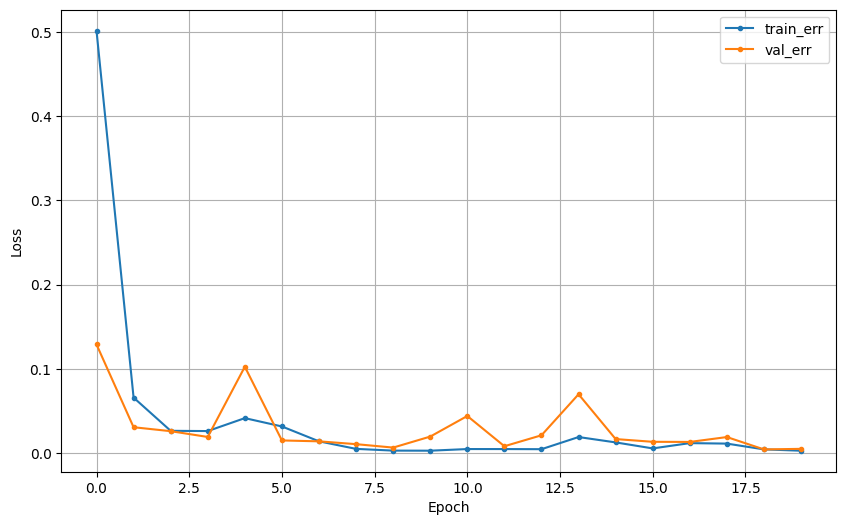

In [ ]:
# Î™®Îç∏ 1: ÏùÄÎãâÏ∏µ 5Í∞ú + Epoch 20 + ÌïôÏäµÎ•† 0.001 + Early Stopping
def build_deep_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(256, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 4
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 5
        Dense(output_dim, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÌïôÏäµ
deep_model = build_deep_model(X_train_d.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = deep_model.fit(X_train_d, y_train_d,
                         validation_data=(X_val_d, y_val_d),
                         epochs=20,
                         batch_size=64,
                         verbose=1,
                         callbacks=[early_stopping])

# ÌïôÏäµÍ≥°ÏÑ†
dl_history_plot(history)

In [ ]:
# ÌèâÍ∞Ä
_, val_accuracy = deep_model.evaluate(X_val_d, y_val_d)
print(f"Validation Accuracy: {val_accuracy:.4f}")

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0040     
Validation Accuracy: 0.9981


Epoch 1/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - accuracy: 0.6900 - loss: 0.7504 - val_accuracy: 0.9377 - val_loss: 0.1819
Epoch 2/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0941 - val_accuracy: 0.9887 - val_loss: 0.0623
Epoch 3/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0394 - val_accuracy: 0.9906 - val_loss: 0.0440
Epoch 4/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9995 - loss: 0.0121 - val_accuracy: 0.9925 - val_loss: 0.0314
Epoch 5/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9925 - val_loss: 0.0257
Epoch 6/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9925 - val_loss: 0.0225
Epoc

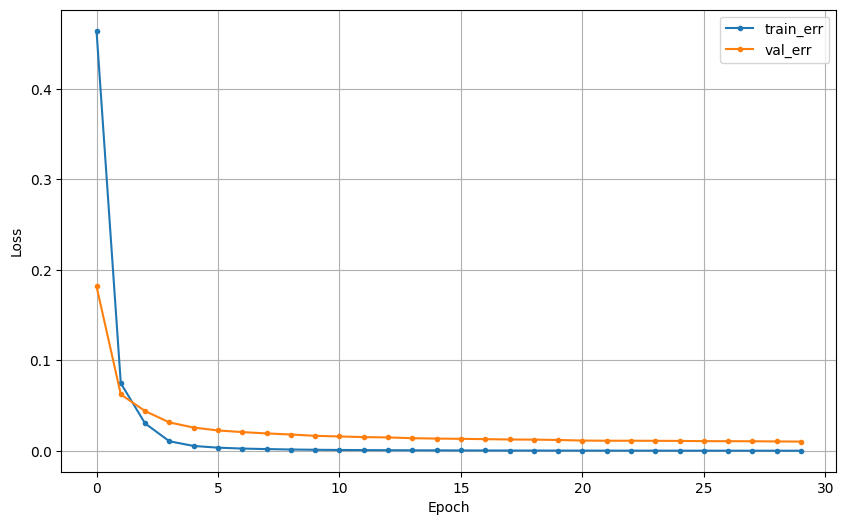

In [ ]:
# Î™®Îç∏ 2: ÏùÄÎãâÏ∏µ 3Í∞ú + Epoch 30 + ÌïôÏäµÎ•† 0.0005 + Early Stopping
def build_lowlr_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(output_dim, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # ÎÇÆÏùÄ ÌïôÏäµÎ•†
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÌïôÏäµ
lowlr_model = build_lowlr_model(X_train_d.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lowlr_model.fit(X_train_d, y_train_d,
                          validation_data=(X_val_d, y_val_d),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# ÌïôÏäµÍ≥°ÏÑ†
dl_history_plot(history)

In [ ]:
# ÌèâÍ∞Ä
_, val_accuracy = lowlr_model.evaluate(X_val_d, y_val_d)
print(f"Validation Accuracy: {val_accuracy:.4f}")

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9932 - loss: 0.0069     
Validation Accuracy: 0.9925


Epoch 1/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6281 - loss: 0.8082 - val_accuracy: 0.9453 - val_loss: 0.1609
Epoch 2/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9608 - loss: 0.1181 - val_accuracy: 0.9774 - val_loss: 0.0667
Epoch 3/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9866 - loss: 0.0510 - val_accuracy: 0.9868 - val_loss: 0.0285
Epoch 4/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9906 - val_loss: 0.0248
Epoch 5/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0227 - val_accuracy: 0.9906 - val_loss: 0.0267
Epoch 6/30
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - accuracy: 0.9911 - loss: 0.0244 - val_accuracy: 0.9887 - val_loss: 0.0265
Epoc

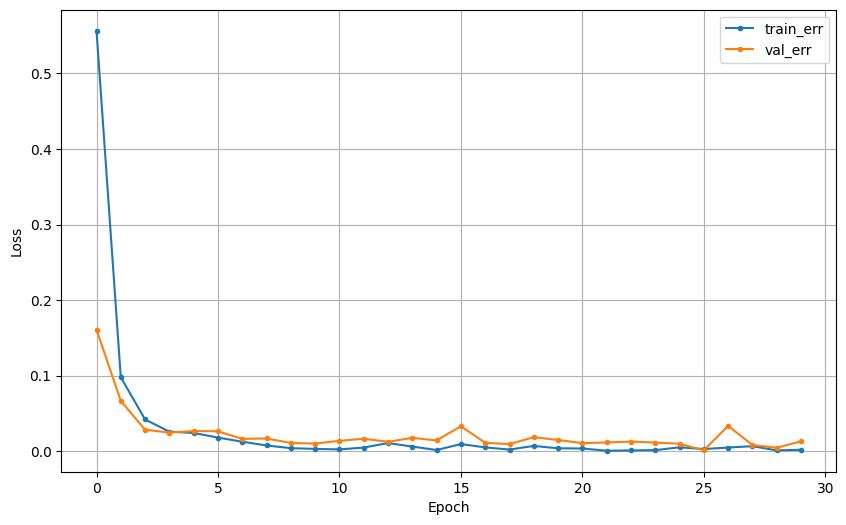

In [ ]:
# Î™®Îç∏ 3: ÏùÄÎãâÏ∏µ 5Í∞ú + Epoch 30 + ÌïôÏäµÎ•† 0.0005 + Early Stopping
def build_tuned_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(256, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 4
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 5
        Dense(output_dim, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÌïôÏäµ
tuned_model = build_tuned_model(X_train_d.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = tuned_model.fit(X_train_d, y_train_d,
                          validation_data=(X_val_d, y_val_d),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# ÌïôÏäµÍ≥°ÏÑ†
dl_history_plot(history)

In [ ]:
# ÌèâÍ∞Ä
_, val_accuracy = tuned_model.evaluate(X_val_d, y_val_d)
print(f"Validation Accuracy: {val_accuracy:.4f}")

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 
Validation Accuracy: 1.0000


## Î∂ÑÎ•ò Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏
* 1Îã®Í≥Ñ, 2Îã®Í≥Ñ Î™®Îç∏ ÌÜµÌï©

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

In [ ]:
# (tip) Ìï®Ïàò ÎßåÎì§Í∏∞
# 1. Ï†ÑÏ≤òÎ¶¨
# 1-1. Ïä§ÏºÄÏùºÎßÅ
# 1-2. ÏûÖÎ†•Í∞í ÎßåÎì§Í∏∞
# ----------------------
# 2. ÏòàÏ∏°ÌïòÍ∏∞
# 2-1. Îã®Í≥Ñ 1 Î™®Îç∏Î°ú 0, 1 Íµ¨Î∂Ñ
# 2-2. Îã®Í≥Ñ 1 Í≤∞Í≥ºÎ°ú Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
# 2-3. Îã®Í≥Ñ 2 Î™®Îç∏Î°ú ÏòàÏ∏°
# 2-4. ÏòàÏ∏° Í≤∞Í≥º ÏõêÎûò Í∞íÏúºÎ°ú Î≥ÄÌôò
# 2-5. ÌïòÎÇòÎ°ú Ìï©Ï≥êÎ≥¥Í∏∞
# ----------------------
# 3. ÏµúÏ¢Ö ÏÑ±Îä• ÌèâÍ∞Ä

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Ï†ÑÏ≤òÎ¶¨
def preprocess_data_binary_multi(df, fit=False, scaler=None, binary_encoder=None, multi_encoder=None):
    """
    Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò: Ïù¥ÏßÑ Î∂ÑÎ•òÏö© + Îã§Ï§ë Î∂ÑÎ•òÏö© ÌÉÄÍ≤ü ÏÉùÏÑ±, Ïä§ÏºÄÏùºÎßÅ

    Parameters:
    - df: ÏûÖÎ†• DataFrame (Activity Ìè¨Ìï®)
    - fit: TrueÎ©¥ scaler Î∞è encoder ÌïôÏäµ
    - scaler, binary_encoder, multi_encoder: Ïû¨ÏÇ¨Ïö© Í∞ÄÎä• Í∞ùÏ≤¥

    Returns:
    - X_scaled: Ïä§ÏºÄÏùºÎßÅÎêú feature
    - y_binary: Ï†ïÏ†Å(0)/ÎèôÏ†Å(1) Ïù¥ÏßÑ Î∂ÑÎ•òÏö© ÌÉÄÍ≤ü (np.array)
    - y_multi_encoded: Îã§Ï§ë ÌÅ¥ÎûòÏä§ Ï†ïÏàò Ïù∏ÏΩîÎî©Îêú ÌÉÄÍ≤ü
    - scaler, binary_encoder, multi_encoder: ÌïôÏäµÎêú Í∞ùÏ≤¥ Î∞òÌôò
    """
    df = df.copy()

    # Ïù¥ÏßÑ Î∂ÑÎ•ò ÌÉÄÍ≤ü ÏÉùÏÑ±
    y_binary = df['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1).values

    # Îã§Ï§ë Î∂ÑÎ•òÏö© ÎùºÎ≤®
    if multi_encoder is None:
        multi_encoder = LabelEncoder()
    if fit:
        y_multi_encoded = multi_encoder.fit_transform(df['Activity'])
    else:
        y_multi_encoded = multi_encoder.transform(df['Activity'])

    # X Íµ¨ÏÑ± (Activity Ï†úÍ±∞)
    X = df.drop(columns=['Activity'])

    # Ïä§ÏºÄÏùºÎßÅ
    if scaler is None:
        scaler = StandardScaler()
    if fit:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)

    return X_scaled, y_binary, y_multi_encoded, scaler, multi_encoder


In [ ]:
# 1Îã®Í≥Ñ Î™®Îç∏
def build_stage1_model():
    model = RandomForestClassifier(random_state=42)
    return model

In [ ]:
# 2Îã®Í≥Ñ Ï†ïÏ†Å Î∂ÑÎ•ò Î™®Îç∏
def build_static_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(3, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # ÎÇÆÏùÄ ÌïôÏäµÎ•†
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# 2Îã®Í≥Ñ ÎèôÏ†Å Î∂ÑÎ•ò Î™®Îç∏
def build_dynamic_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # ÏûÖÎ†•Ï∏µ
        Dense(256, activation='relu'),  # ÏùÄÎãâÏ∏µ 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # ÏùÄÎãâÏ∏µ 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 3
        Dense(64, activation='relu'),  # ÏùÄÎãâÏ∏µ 4
        Dense(32, activation='relu'),  # ÏùÄÎãâÏ∏µ 5
        Dense(3, activation='softmax')  # Ï∂úÎ†•Ï∏µ
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# ÏµúÏ¢Ö Î™®Îç∏
def final_motion_classifier_v2(X_test_scaled, y_test_multi, model_stage1, model_static, model_dynamic):
    """
    ÏµúÏ¢Ö Î∂ÑÎ•ò ÌååÏù¥ÌîÑÎùºÏù∏:
    - 1Îã®Í≥Ñ: Ï†ïÏ†Å/ÎèôÏ†Å ÏòàÏ∏° (model_stage1: RandomForest)
    - 2Îã®Í≥Ñ: Ï†ïÏ†ÅÏù¥Î©¥ model_static (DNN), ÎèôÏ†ÅÏù¥Î©¥ model_dynamic (DNN)
    - 3Îã®Í≥Ñ: Í≤∞Í≥º ÌÜµÌï© + ÌèâÍ∞Ä Ï∂úÎ†•

    Parameters:
    - X_test_scaled: Ïä§ÏºÄÏùºÎêú ÏûÖÎ†•
    - y_test_multi: Îã§Ï§ë Î∂ÑÎ•òÏö© Ï†ïÎãµ Î†àÏù¥Î∏î (0~5)
    - model_stage1: Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ (0: Ï†ïÏ†Å, 1: ÎèôÏ†Å)
    - model_static: Ï†ïÏ†Å ÌñâÎèô Î∂ÑÎ•ò Î™®Îç∏ (0~2)
    - model_dynamic: ÎèôÏ†Å ÌñâÎèô Î∂ÑÎ•ò Î™®Îç∏ (0~2, Í≤∞Í≥ºÎäî +3 Ìï¥ÏïºÌï®)

    Returns:
    - y_pred: ÏµúÏ¢Ö ÏòàÏ∏° Î†àÏù¥Î∏î (0~5)
    - accuracy: Ï†ïÌôïÎèÑ
    - report: classification_report Î¨∏ÏûêÏó¥
    """
    # 1Îã®Í≥Ñ: Ï†ïÏ†Å/ÎèôÏ†Å Î∂ÑÎ•ò
    is_dynamic_pred = model_stage1.predict(X_test_scaled)

    # Ïù∏Îç±Ïä§ Î∂ÑÎ¶¨
    static_idx = np.where(is_dynamic_pred == 0)[0]
    dynamic_idx = np.where(is_dynamic_pred == 1)[0]

    # Í≤∞Í≥º Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    y_pred = np.empty(len(X_test_scaled), dtype=int)

    # 2Îã®Í≥Ñ: Ï†ïÏ†Å ÏòàÏ∏°
    if len(static_idx) > 0:
        y_pred[static_idx] = model_static.predict(X_test_scaled[static_idx]).argmax(axis=1)  # 0~2

    # 2Îã®Í≥Ñ: ÎèôÏ†Å ÏòàÏ∏°
    if len(dynamic_idx) > 0:
        y_pred[dynamic_idx] = model_dynamic.predict(X_test_scaled[dynamic_idx]).argmax(axis=1) + 3  # 3~5

    # 3Îã®Í≥Ñ: ÌèâÍ∞Ä
    accuracy = accuracy_score(y_test_multi, y_pred)
    report = classification_report(
        y_test_multi,
        y_pred,
        target_names=[
            'LAYING', 'SITTING', 'STANDING',
            'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'
        ]
    )

    print(f"\n‚úÖ ÏµúÏ¢Ö Ï†ïÌôïÎèÑ: {accuracy:.4f}")
    print("\nüìä Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:")
    print(report)

    return y_pred, accuracy, report

In [ ]:
# Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/miniproject1/'

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_test.csv')
df_features = pd.read_csv(path + 'features.csv')

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
df_train.drop('subject', axis=1, inplace=True)
df_test.drop('subject', axis=1, inplace=True)

Mounted at /content/drive


In [ ]:
# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
X_train_scaled, y_train_binary, y_train_multi, scaler, multi_encoder = preprocess_data_binary_multi(df_train, fit=True)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
X_test_scaled, y_test_binary, y_test_multi, _, _ = preprocess_data_binary_multi(
    df_test, fit=False, scaler=scaler, multi_encoder=multi_encoder
)

# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
static_idx = np.where(y_train_binary == 0)[0]
dynamic_idx = np.where(y_train_binary == 1)[0]
X_static, y_static = X_train_scaled[static_idx], y_train_multi[static_idx]
X_dynamic, y_dynamic = X_train_scaled[dynamic_idx], y_train_multi[dynamic_idx] - 3

# Î™®Îç∏ ÌïôÏäµ
model_stage1 = build_stage1_model()
model_stage1.fit(X_train_scaled, y_train_binary)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_static = build_static_model(X_static.shape[1])
model_static.fit(X_static, y_static, epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

model_dynamic = build_dynamic_model(X_dynamic.shape[1])
model_dynamic.fit(X_dynamic, y_dynamic, epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred, acc, report = final_motion_classifier_v2(X_test_scaled, y_test_multi, model_stage1, model_static, model_dynamic)

Epoch 1/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.6473 - loss: 0.8115
Epoch 2/30
44/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9190 - loss: 0.2182

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9208 - loss: 0.2138
Epoch 3/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9267 - loss: 0.1833
Epoch 4/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9617 - loss: 0.0960
Epoch 5/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9724 - loss: 0.0813
Epoch 6/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9750 - loss: 0.0733
Epoch 7/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9813 - loss: 0.0600
Epoch 8/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9802 - loss: 0.0551
Epoch 9/30
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0606
Epoch 10/30
51/51 ‚